In [1]:

import numpy as np
import torch
import cv2 as cv
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.optim import RMSprop
from torch.optim.lr_scheduler import StepLR
from data_loaders import CAERSDataset
from utils import get_transform, accuracy, accuracy_julia
from model import model_generator
from tqdm import tqdm
import os.path as osp
from keras.models import load_model
import tensorflow as tf
import os


c:\Users\jdts\anaconda3\envs\emotionram\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [81]:

captura = cv.VideoCapture(0)
model_path = '.\models\\faces_19_95.01295733262594.pth'
model = torch.load(model_path)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") ## Se a maquina não tiver GPU o teste será rodado na CPU


model.to(device)

opt = RMSprop(model.parameters(), lr=3e-3)
lr_scheduler = StepLR(opt, 60, 0.4)





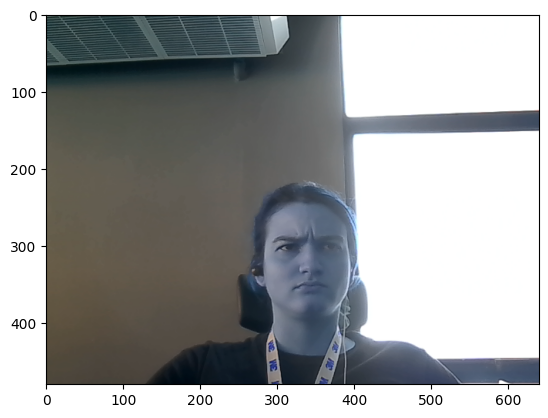

In [71]:
import matplotlib.pyplot as plt
ret, frame = captura.read()
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
plt.imshow(frame)

In [72]:
x,y,w,h = faces[0]
print(x, y, w, h)

267 248 139 139


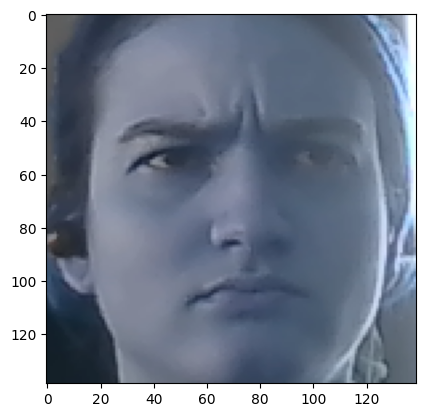

In [73]:

frame_ = frame[y:y+h, x:x+w, :] # y+ h e x+w
plt.imshow(frame_)

In [74]:
from utils import get_transform, accuracy, accuracy_julia
my_transforms = get_transform(train=False)
data = {
            'face': frame
        }
transformed_frame = my_transforms(data)


In [79]:
#type(frame_)
frame_torch = torch.asarray(transformed_frame["face"])
#frame_t = torch.from_numpy(frame_)
print(type(transformed_frame))

<class 'dict'>


In [80]:
#preds = model(frame_torch.to(device))
test_outs =[]
print(frame_torch.shape)
frame_torch = torch.unsqueeze(frame_torch, 0)
preds= model(frame_torch.to(device))
preds = preds.to('cpu')
print(preds)
emotion= []
emotion.extend(torch.argmax(preds, dim=1))
emotion=str(emotion[0].numpy())
print(emotion)
if emotion == 4 :
    lista_preds = preds[0].tolist()
    neutral=lista_preds[4]
    
    


torch.Size([3, 96, 96])
tensor([[ 3.0256, -5.8076, -5.6854, -1.9323,  3.6424, -6.7430,  0.9017]],
       grad_fn=<ToCopyBackward0>)
4


In [93]:
lista_preds = preds[0].tolist()
print(lista_preds)

[3.025613784790039, -5.807562828063965, -5.685375213623047, -1.9323192834854126, 3.642392635345459, -6.743015766143799, 0.9016971588134766]


In [59]:
def set_emotion(label):

    if label == '0' :
        emotion = 'Angry'
    elif label == '1':
        emotion = 'Disgust'
    elif label == '2':
        emotion = 'Fear'
    elif label == '3':
        emotion = 'Happy'
    elif label == '4':
        emotion = 'Neutral'
    elif label == '5':
        emotion = 'Sad'
    elif label == '6':
        emotion = 'Surprise'
    return emotion

In [61]:
em_pred= set_emotion(emotion)
print(em_pred)

Neutral


In [19]:
#tf.disable_v2_behavior()
#(x,y),(x+w,y+h)

while(1):

    ret, frame = captura.read()
    #cv.imshow("Video", frame)
    # convert to grayscale of each frames
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # read haacascade to detect faces in input image
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

        # detects faces in the input image
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)

    #face_tensor = np.load(faces.decode())
    

    print('Number of detected faces:', len(faces))\

        # loop over all the detected faces
    for (x,y,w,h) in faces:
        ret, frame = captura.read()
        
        
        face_cut =  frame[y:y+h, x: x+w]
        preds = model(torch.unsqueeze(face_cut, dim=0))
        preds = model(face_cut.to(device))
        preds = preds.to('cpu')



        image= cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        cv.putText(image,preds, (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # Display an image in a window
        cv.imshow('emotionRAM',image)

        k = cv.waitKey(30) & 0xff
        if k == 27:
           break

captura.release()
cv.destroyAllWindows()

Number of detected faces: 1


TypeError: unsqueeze(): argument 'input' (position 1) must be Tensor, not numpy.ndarray